In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [10]:
# Load the test dataset
test_data = pd.read_csv('/Users/apple/Documents/Projects/titanic-survival-prediction/data/test_preprocessed.csv')

# Load the trained model
model = joblib.load('/Users/apple/Documents/Projects/titanic-survival-prediction/models/model.pkl')

In [11]:
# Separate features and target variable
X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']

# Make predictions using the trained model
y_pred = model.predict(X_test)

In [12]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_rep)

Accuracy: 83.01%
Confusion Matrix:
[[227  39]
 [ 32 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       266
           1       0.75      0.79      0.77       152

    accuracy                           0.83       418
   macro avg       0.82      0.82      0.82       418
weighted avg       0.83      0.83      0.83       418



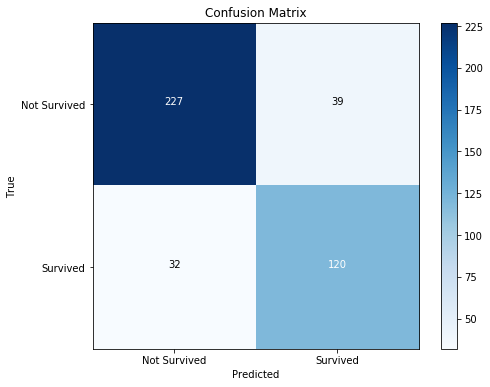

In [13]:
# Plot a confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not Survived', 'Survived'])
plt.yticks(tick_marks, ['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion[i, j], horizontalalignment='center', color='white' if confusion[i, j] > confusion.max() / 2 else 'black')
plt.show()